---
title: "the geometry of regression"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## a very simple example

It's almost always best to start with a simple and concrete example.

**Goal:** We wish to find the best straight line that describes the following data points:

In [19]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import scipy

# %matplotlib widget

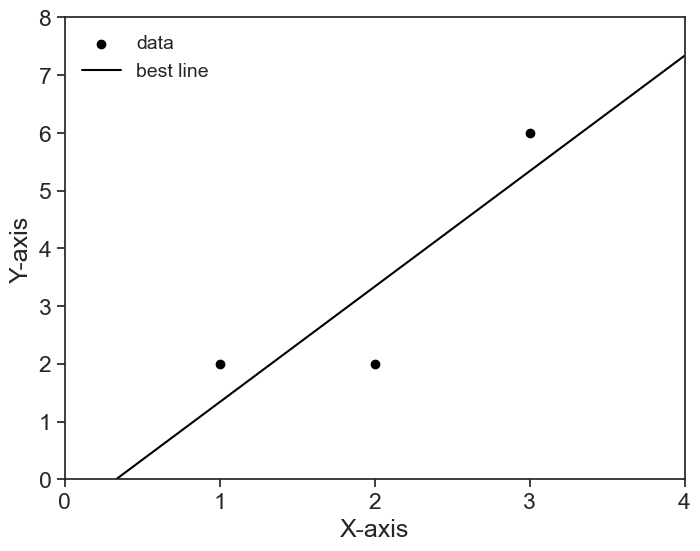

In [20]:
#| code-summary: "define and plot the simple problem"
x = np.array([1, 2, 3])
y = np.array([2, 2, 6])

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, y, label='data', facecolors='black', edgecolors='black')
# linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
x_domain = np.linspace(0, 4, 101)
ax.plot(x_domain, intercept + slope * x_domain, color='black', label='best line')

ax.legend(loc='upper left', fontsize=14, frameon=False)
ax.set(xlim=(0, 4),
       ylim=(0, 7),
       xticks=np.arange(0, 5, 1),
       yticks=np.arange(0, 9, 1),
       xlabel='X-axis',
       ylabel='Y-axis');

## formalizing the problem

Let's translate this problem into the language of linear algebra.

The independent variable $x$ is the column vector

$$
x=
\begin{pmatrix}
1 \\ 2 \\ 3
\end{pmatrix}
$$

and the dependent variable $y$ is the column vector

$$
y=
\begin{pmatrix}
2 \\ 2 \\ 6
\end{pmatrix}.
$$

Because we are looking for a straight line, we can express the relationship between $x$ and $y$ as

$$
\tilde{y} = \beta_0 + \beta_1 x.
$$

Here we introduced the notation $\tilde{y}$ to denote the predicted values of $y$ based on the linear model. It is different from the actual values of $y$ because the straight line usually does not pass exactly on top of $y$.

The parameter $\beta_0$ is the intercept and $\beta_1$ is the slope of the line.

**Which values of $\beta_0,\beta_1$ will give us the very best line?**

## higher dimensions

It is very informative to think about this problem not as a scatter plot in the $X-Y$ plane, but as taking place in a higher-dimensional space. Because we have three data points, we can think of the problem in a three-dimensional space. We want to explain the vector $y$ as a linear combination of the vector $x$ and a constant vector (this is what out linear model states).

In three dimensions, our building blocks are the vectors $c$, the intercept, and $x$, the data points.

$$
c=
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}, \qquad
x=
\begin{pmatrix}
1 \\ 2 \\ 3
\end{pmatrix}.
$$

We can combine these two vectors in a matrix called **design matrix**:

$$
X=
\begin{pmatrix}
1 & x_0 \\
| & | \\
1 & x_i \\
| & | \\
1 & x_n
\end{pmatrix}
=
\begin{pmatrix}
| & | \\
1 & x \\
| & |
\end{pmatrix}
$$

Why is this convenient? Because now the linear combination of $c$ and $x$ can be expressed as a matrix multiplication:

$$
\begin{pmatrix}
\tilde{y}_0 \\
\tilde{y}_1 \\
\tilde{y}_2
\end{pmatrix} 
=
\begin{pmatrix}
1 & x_0 \\
1 & x_1 \\
1 & x_2 \\
\end{pmatrix}
\begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
=
\begin{pmatrix}
1\cdot\beta_0 + x_0\cdot\beta_1 \\
1\cdot\beta_0 + x_1\cdot\beta_1 \\
1\cdot\beta_0 + x_2\cdot\beta_1
\end{pmatrix} 
$$

In short, the linear combination of our two building blocks yields a prediction vector $\tilde{y}$:

$$
\tilde{y} = X \beta
$$

This prediction vector $\tilde{y}$ lies on a plane in the 3d space, it cannot be anywhere. Mathematically, we say that the vector $\tilde{y}$ is in the subspace spanned by the columns of the design matrix $X$.

It will be extremely improbable that the vector $y$ will also lie on this plane, so we will have to find the best prediction $\tilde{y}$ that lies on this plane. Geometrically, our goal is to find the point $\tilde{y}$ on the plane that is **closest** to the point $y$ in the 3d space.

* When the distance $r=y-\tilde{y}$ is minimized, the vector $r$ is orthogonal to the plane spanned by the columns of the design matrix $X$.
* We call this vector $r$ the **residual vector**.
* The residual is orthogonal to the columns of $X$, that is, $c\cdot r=0$ and $x\cdot r=0$.

I tried to summarize all the above in the 3d image below:

<iframe src="https://www.geogebra.org/3d/yjsuhu96?embed" width="800" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

Taking advantage of the matrix notation, we can express the orthogonality condition as follows:

$$
\begin{pmatrix}
- & c & - \\
- & x & -
\end{pmatrix} r =
X^T r =
0
$$

Let's substitute $r = y - \tilde{y} = y - X\beta$ into the above equation:

$$
X^T(y - X\beta) = 0
$$

Distributing yields:

$$
X^Ty - X^TX\beta = 0
$$

and then

$$
X^TX\beta = X^Ty
$$

We need to solve this equation for $\beta$:

$$
\beta = (X^TX)^{-1}X^Ty
$$

That's it. We've done it. Given the data points $x$ and $y$, we can compute the parameters $\beta_0$ and $\beta_1$ that bring $\tilde{y}$ as close as possible to $y$. These parameters are the best fit of the straight line to the data points.

## overdetermined system

The *design matrix* $X$ is a tall and skinny matrix, meaning that it has more rows ($n$) than columns ($m$). This is called an **overdetermined system**, because we have more equations (rows) than unknowns (columns), so we have no hope in finding an exact solution $\beta.

This is to say that, almost certainly, the vector $y$ does not lie on the plane spanned by the columns of the design matrix $X$. No combination of the parameters $\beta$ will yield a vector $\tilde{y}$ that is exactly equal to $y$.


## least squares

The method above for finding the best parameters $\beta$ is called **least squares**. The name comes from the fact that we are trying to minimize the length of the residual vector $r = y - \tilde{y}$.

The length of the residual is given by the Euclidean norm (or $L^2$ norm), which is a direct generalization of the Pythagorean theorem for many dimensions.

\begin{align}
\Vert r\Vert^2 &= \Vert y - \tilde{y}\Vert^2  \\
 &= (y_0 - \tilde{y}_0)^2 + (y_1 - \tilde{y}_1)^2 + \cdots +  (y_{n-1} - \tilde{y}_{n-1})^2 \\
 &= r_0^2 + r_1^2 + \cdots + r_{n-1}^2
\end{align}

The length (squared) of the residual vector is the sum of the squares of all residuals. The best parameters $\beta$ are those that yield the **least squares**, thus the name.

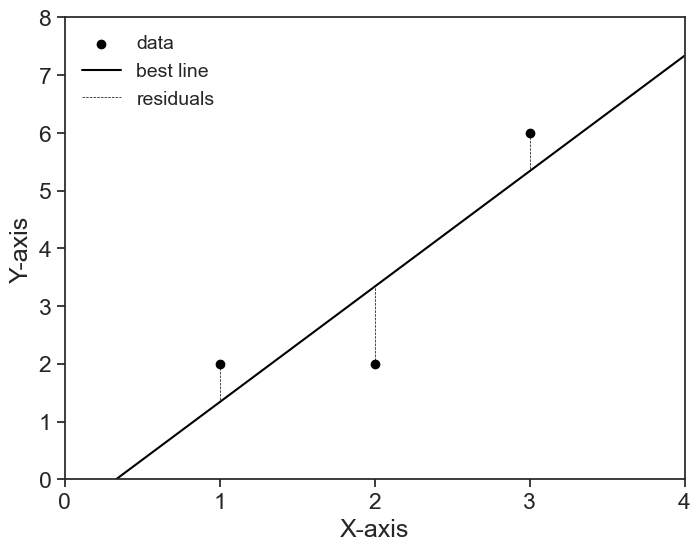

In [22]:
#| code-summary: "define and plot the simple problem"
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x, y, label='data', facecolors='black', edgecolors='black')
x_domain = np.linspace(0, 4, 101)
ax.plot(x_domain, intercept + slope * x_domain, color='black', label='best line')

def linear(x, slope, intercept):
    return intercept + slope * x

for i, xi in enumerate(x):
    ax.plot([xi, xi],
            [y[i], linear(xi, slope, intercept)],
            color='black', linestyle='--', linewidth=0.5,
            label='residuals' if i == 0 else None)
    
ax.legend(loc='upper left', fontsize=14, frameon=False) 
ax.set(xlim=(0, 4),
       ylim=(0, 7),
       xticks=np.arange(0, 5, 1),
       yticks=np.arange(0, 9, 1),
       xlabel='X-axis',
       ylabel='Y-axis');